# Single-user - exchange - speculation

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Read entire df

In [2]:
# Read csv
frames = []

for main_user_strategy in ["RANDOM", "KEEP-RENTING", "INSTANT-BUY", "DET", "RAND", "A-ADAPTED"]:
# for main_user_strategy in ["A-ADAPTED"]:
    for price_trend in ["None", "VET-up", "VET-down"]:
    # for price_trend in ["VET-down"]:
        df_temp = pd.read_csv(f"Model/Experiments/single-user-exchange-speculation/output/data/10000/single-user-exchange-speculation_{main_user_strategy}_{price_trend}.csv")
        df_temp["price_trend"] = price_trend
        frames.append(df_temp)

df = pd.concat(frames)

keep_columns = ["RunId", "main_user_strategy", "AgentID", "state", "bought_at_day", "max_days", "initial_buy_price",
                "potential_FIAT_spent_rent", "total_FIAT_spent_rent", "total_FIAT_spent_buying", "optimal", "main_user_CR", "adoption_ratio", "price_trend", "y"]
df = df[keep_columns]

# Set buying at day 1 from 0 to 1
df.loc[(df['bought_at_day'] == 0) & (df['state'] == 'BOUGHT'), 'bought_at_day'] = 1

# Calculate the adoption speed
df["adoption_speed"] = df["bought_at_day"] / 3650

# df = df.groupby("main_user_strategy")
# df = df.get_group("A-TREND")
# df = df[df["main_user_strategy"] != "RANDOM"]
# df = df[df["main_user_strategy"] != "KEEP-RENTING"]
# df = df[df["main_user_strategy"] != "INSTANT-BUY"]
# df = df[df["main_user_strategy"] != "RAND"]

df = df.reset_index()
df[df["main_user_strategy"] == "A-ADAPTED"][:]


,index,RunId,main_user_strategy,AgentID,state,bought_at_day,max_days,initial_buy_price,potential_FIAT_spent_rent,total_FIAT_spent_rent,total_FIAT_spent_buying,optimal,main_user_CR,adoption_ratio,price_trend,y,adoption_speed
150000,0,0,A-ADAPTED,1,RENTING,0,315,12260362113.821,93724342.848,93724342.848,0.000,93724342.848,1.000,0.000,None,1.000,0.000
150001,1,1,A-ADAPTED,1,RENTING,0,707,12257485538.199,1426915496.755,1426915496.755,0.000,1426915496.755,1.000,0.000,None,1.000,0.000
150002,2,2,A-ADAPTED,1,RENTING,0,862,12258582372.514,3278607727.193,3278607727.193,0.000,3278607727.193,1.000,0.000,None,0.999,0.000
150003,3,3,A-ADAPTED,1,BOUGHT,1185,2920,12260191271.685,80491232474.151,12155957646.044,12258090234.470,12260191271.685,1.991,1.000,None,0.991,0.325
150004,4,4,A-ADAPTED,1,BOUGHT,1260,2608,12258422869.949,61452596012.804,12114283271.936,12256491153.002,12258422869.949,1.988,1.000,None,0.989,0.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,9995,9995,A-ADAPTED,1,BOUGHT,1234,1663,12261969274.550,27272744713.624,11652092008.478,11745054423.474,12261969274.550,1.908,1.000,VET-down,0.994,0.338
179996,9996,9996,A-ADAPTED,1,BOUGHT,1227,1260,12257966479.337,12728068669.509,11576185965.373,11734339149.317,12257966479.337,1.902,1.000,VET-down,0.989,0.336
179997,9997,9997,A-ADAPTED,1,BOUGHT,1182,2397,12261313305.627,57094406081.005,11709485396.605,11778604239.765,12261313305.627,1.916,1.000,VET-down,0.991,0.324
179998,9998,9998,A-ADAPTED,1,BOUGHT,1222,3167,12260191271.685,86347121142.793,11651024244.371,11730937953.236,12260191271.685,1.907,1.000,VET-down,0.996,0.335


In [3]:
# df[df['bought_at_day'] == 1]


### Mean CR per algorithm

In [4]:
df.groupby(["main_user_strategy", "price_trend"])["main_user_CR"].mean()


main_user_strategy  price_trend
A-ADAPTED           None            1.661
                    VET-down        1.604
                    VET-up          2.038
DET                 None            1.670
                    VET-down        1.613
                    VET-up          2.055
INSTANT-BUY         None          111.584
                    VET-down      119.958
                    VET-up        119.931
KEEP-RENTING        None            8.849
                    VET-down        8.836
                    VET-up          9.056
RAND                None            1.695
                    VET-down        1.647
                    VET-up          2.037
RANDOM              None            9.180
                    VET-down        7.624
                    VET-up          7.746
Name: main_user_CR, dtype: float64

In [5]:
# import scipy

# a = [2.07]*1000
# b = [2.02]*1000
# scipy.stats.ttest_ind(a, b)


### Worst-case achieved CR

In [6]:
df.groupby(["main_user_strategy", "price_trend"])["main_user_CR"].max()


main_user_strategy  price_trend
A-ADAPTED           None              2.002
                    VET-down          2.002
                    VET-up            2.765
DET                 None              2.004
                    VET-down          1.993
                    VET-up            2.725
INSTANT-BUY         None          39783.070
                    VET-down      29595.925
                    VET-up        26227.166
KEEP-RENTING        None             38.822
                    VET-down         39.084
                    VET-up           39.626
RAND                None            159.740
                    VET-down         69.044
                    VET-up          283.220
RANDOM              None           2418.665
                    VET-down       2697.195
                    VET-up          903.016
Name: main_user_CR, dtype: float64

### Adoption ratio

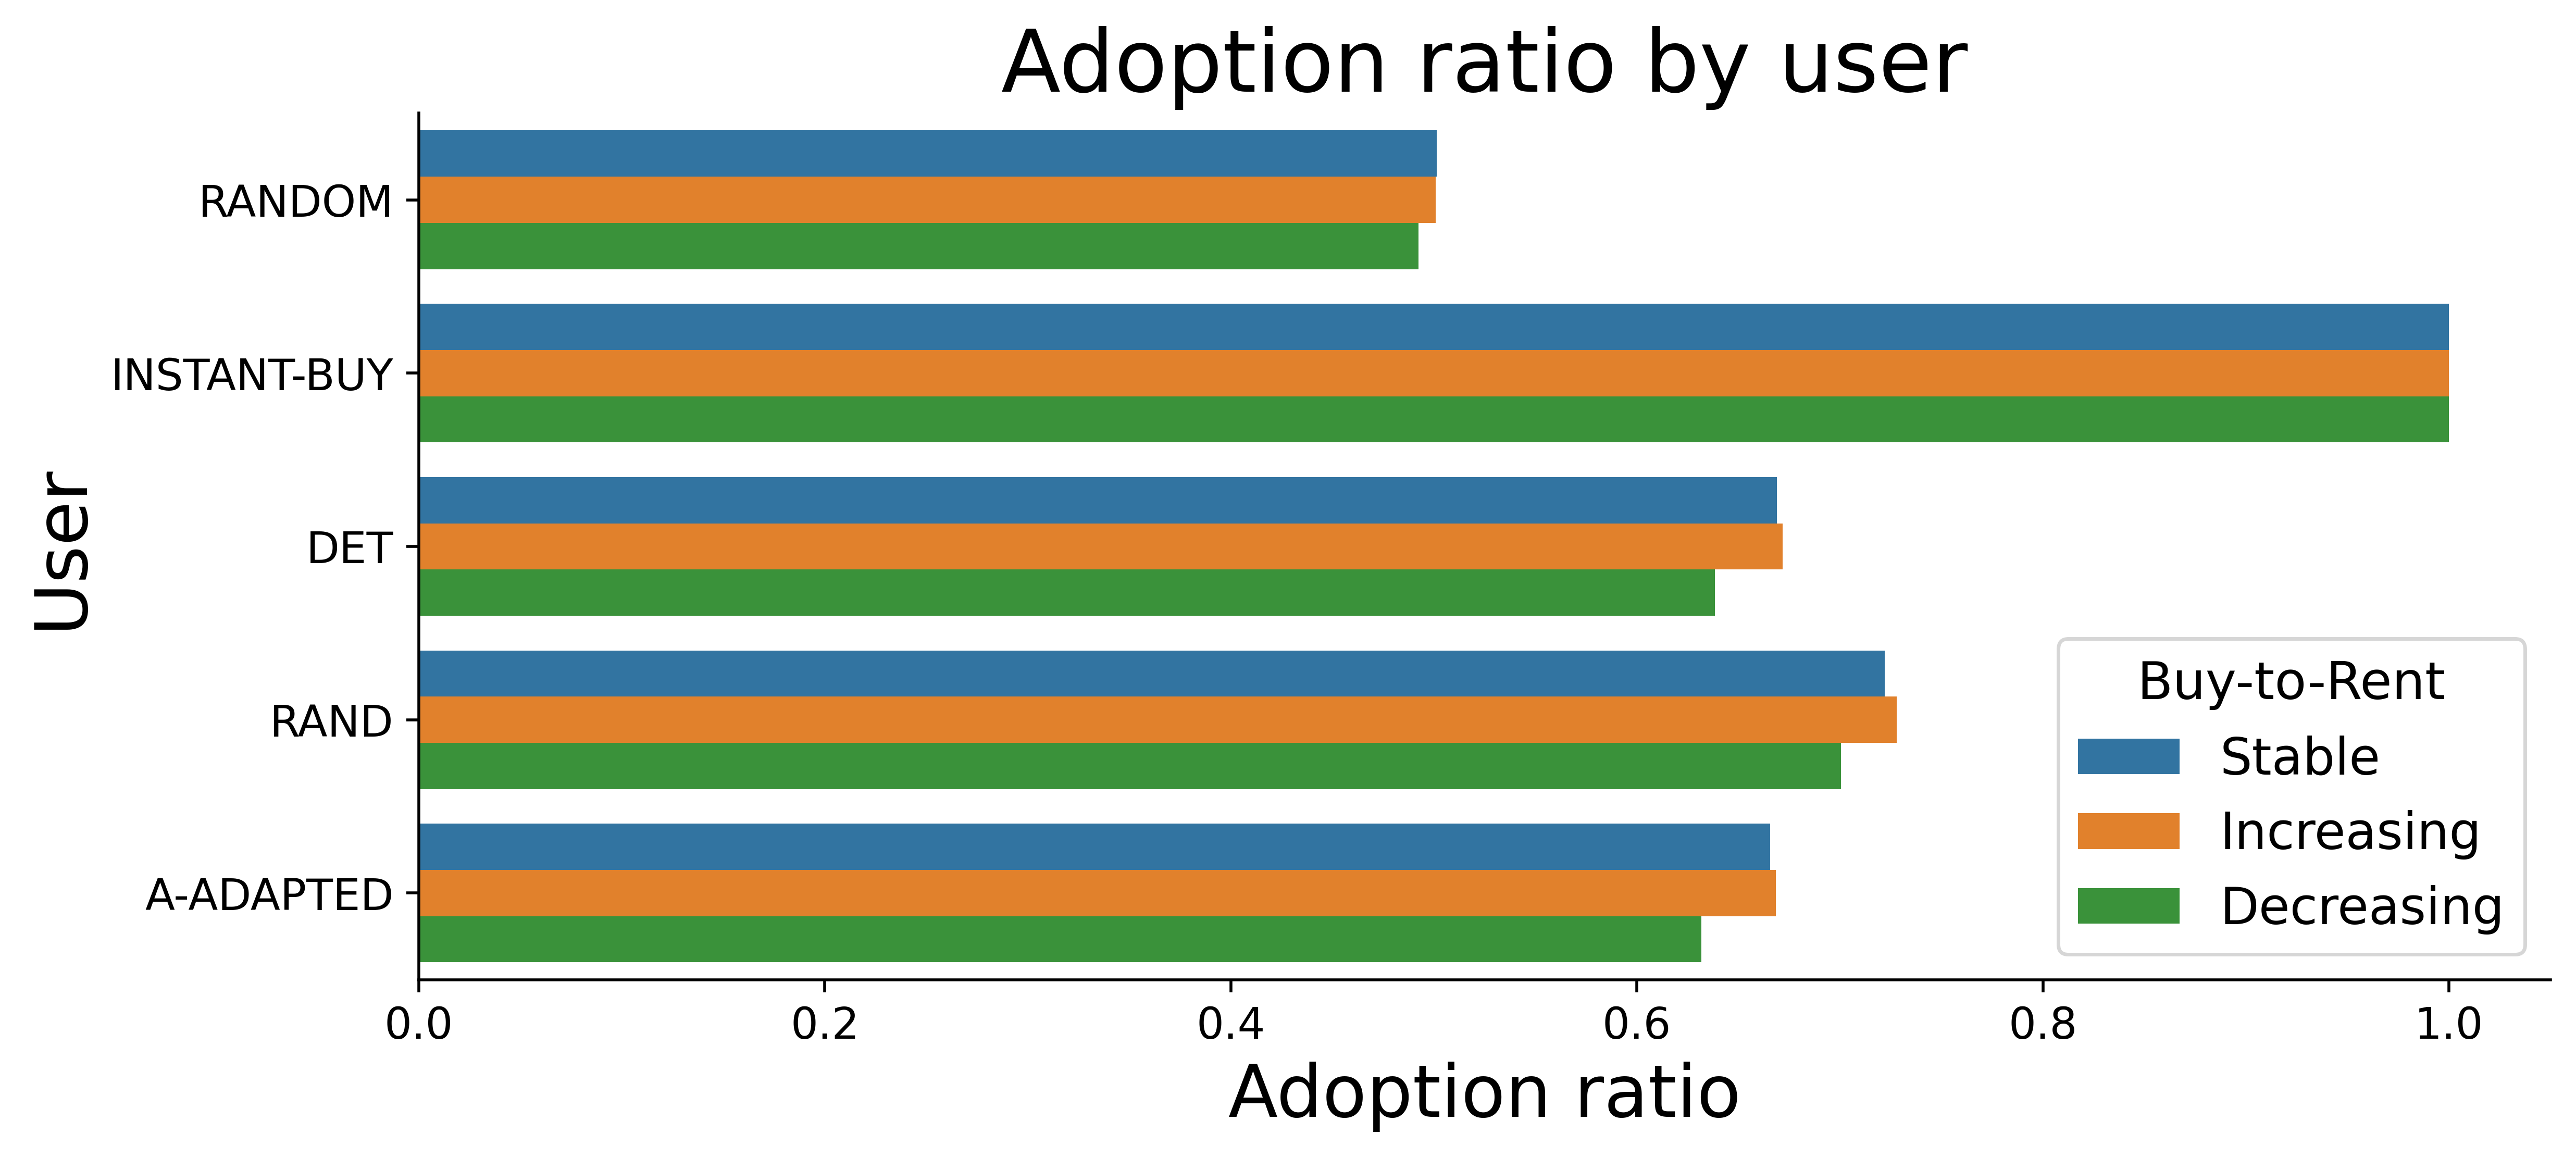

In [7]:
_df_tmp = df.groupby(["main_user_strategy", "price_trend", "state"]).size()
_df_tmp = pd.DataFrame(_df_tmp).reset_index()
_df_tmp.columns = ["main_user_strategy", "price_trend", "state", "count"]
_df_tmp = _df_tmp[_df_tmp["state"] == "BOUGHT"]
_df_tmp["adoption_ratio"] = _df_tmp["count"]/10000

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.title("Adoption ratio by user", fontsize=24)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# sns.violinplot(x="main_user_strategy", y="main_user_CR", data=df, hue="usage_trend", split="true", cut=0)
sns.barplot(y="main_user_strategy", x="adoption_ratio", data=_df_tmp,
            hue="price_trend", orient="h", order=["RANDOM", "INSTANT-BUY", "DET", "RAND", "A-ADAPTED"])


ax.set_xlabel('Adoption ratio', fontsize=20)
ax.set_ylabel('User', fontsize=20)


labels=["Stable", "Increasing", "Decreasing"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, fontsize=14, title="Buy-to-Rent")

sns.despine(offset=0, trim=False, left=False)
plt.savefig(
    "Model/Experiments/single-user-exchange-speculation/output/img/single-user-speculation-adoption-ratio.pdf",  format="pdf", bbox_inches="tight")
plt.savefig("Presentation/single-user-speculation-adoption-ratio.png",
            format="png", bbox_inches="tight")


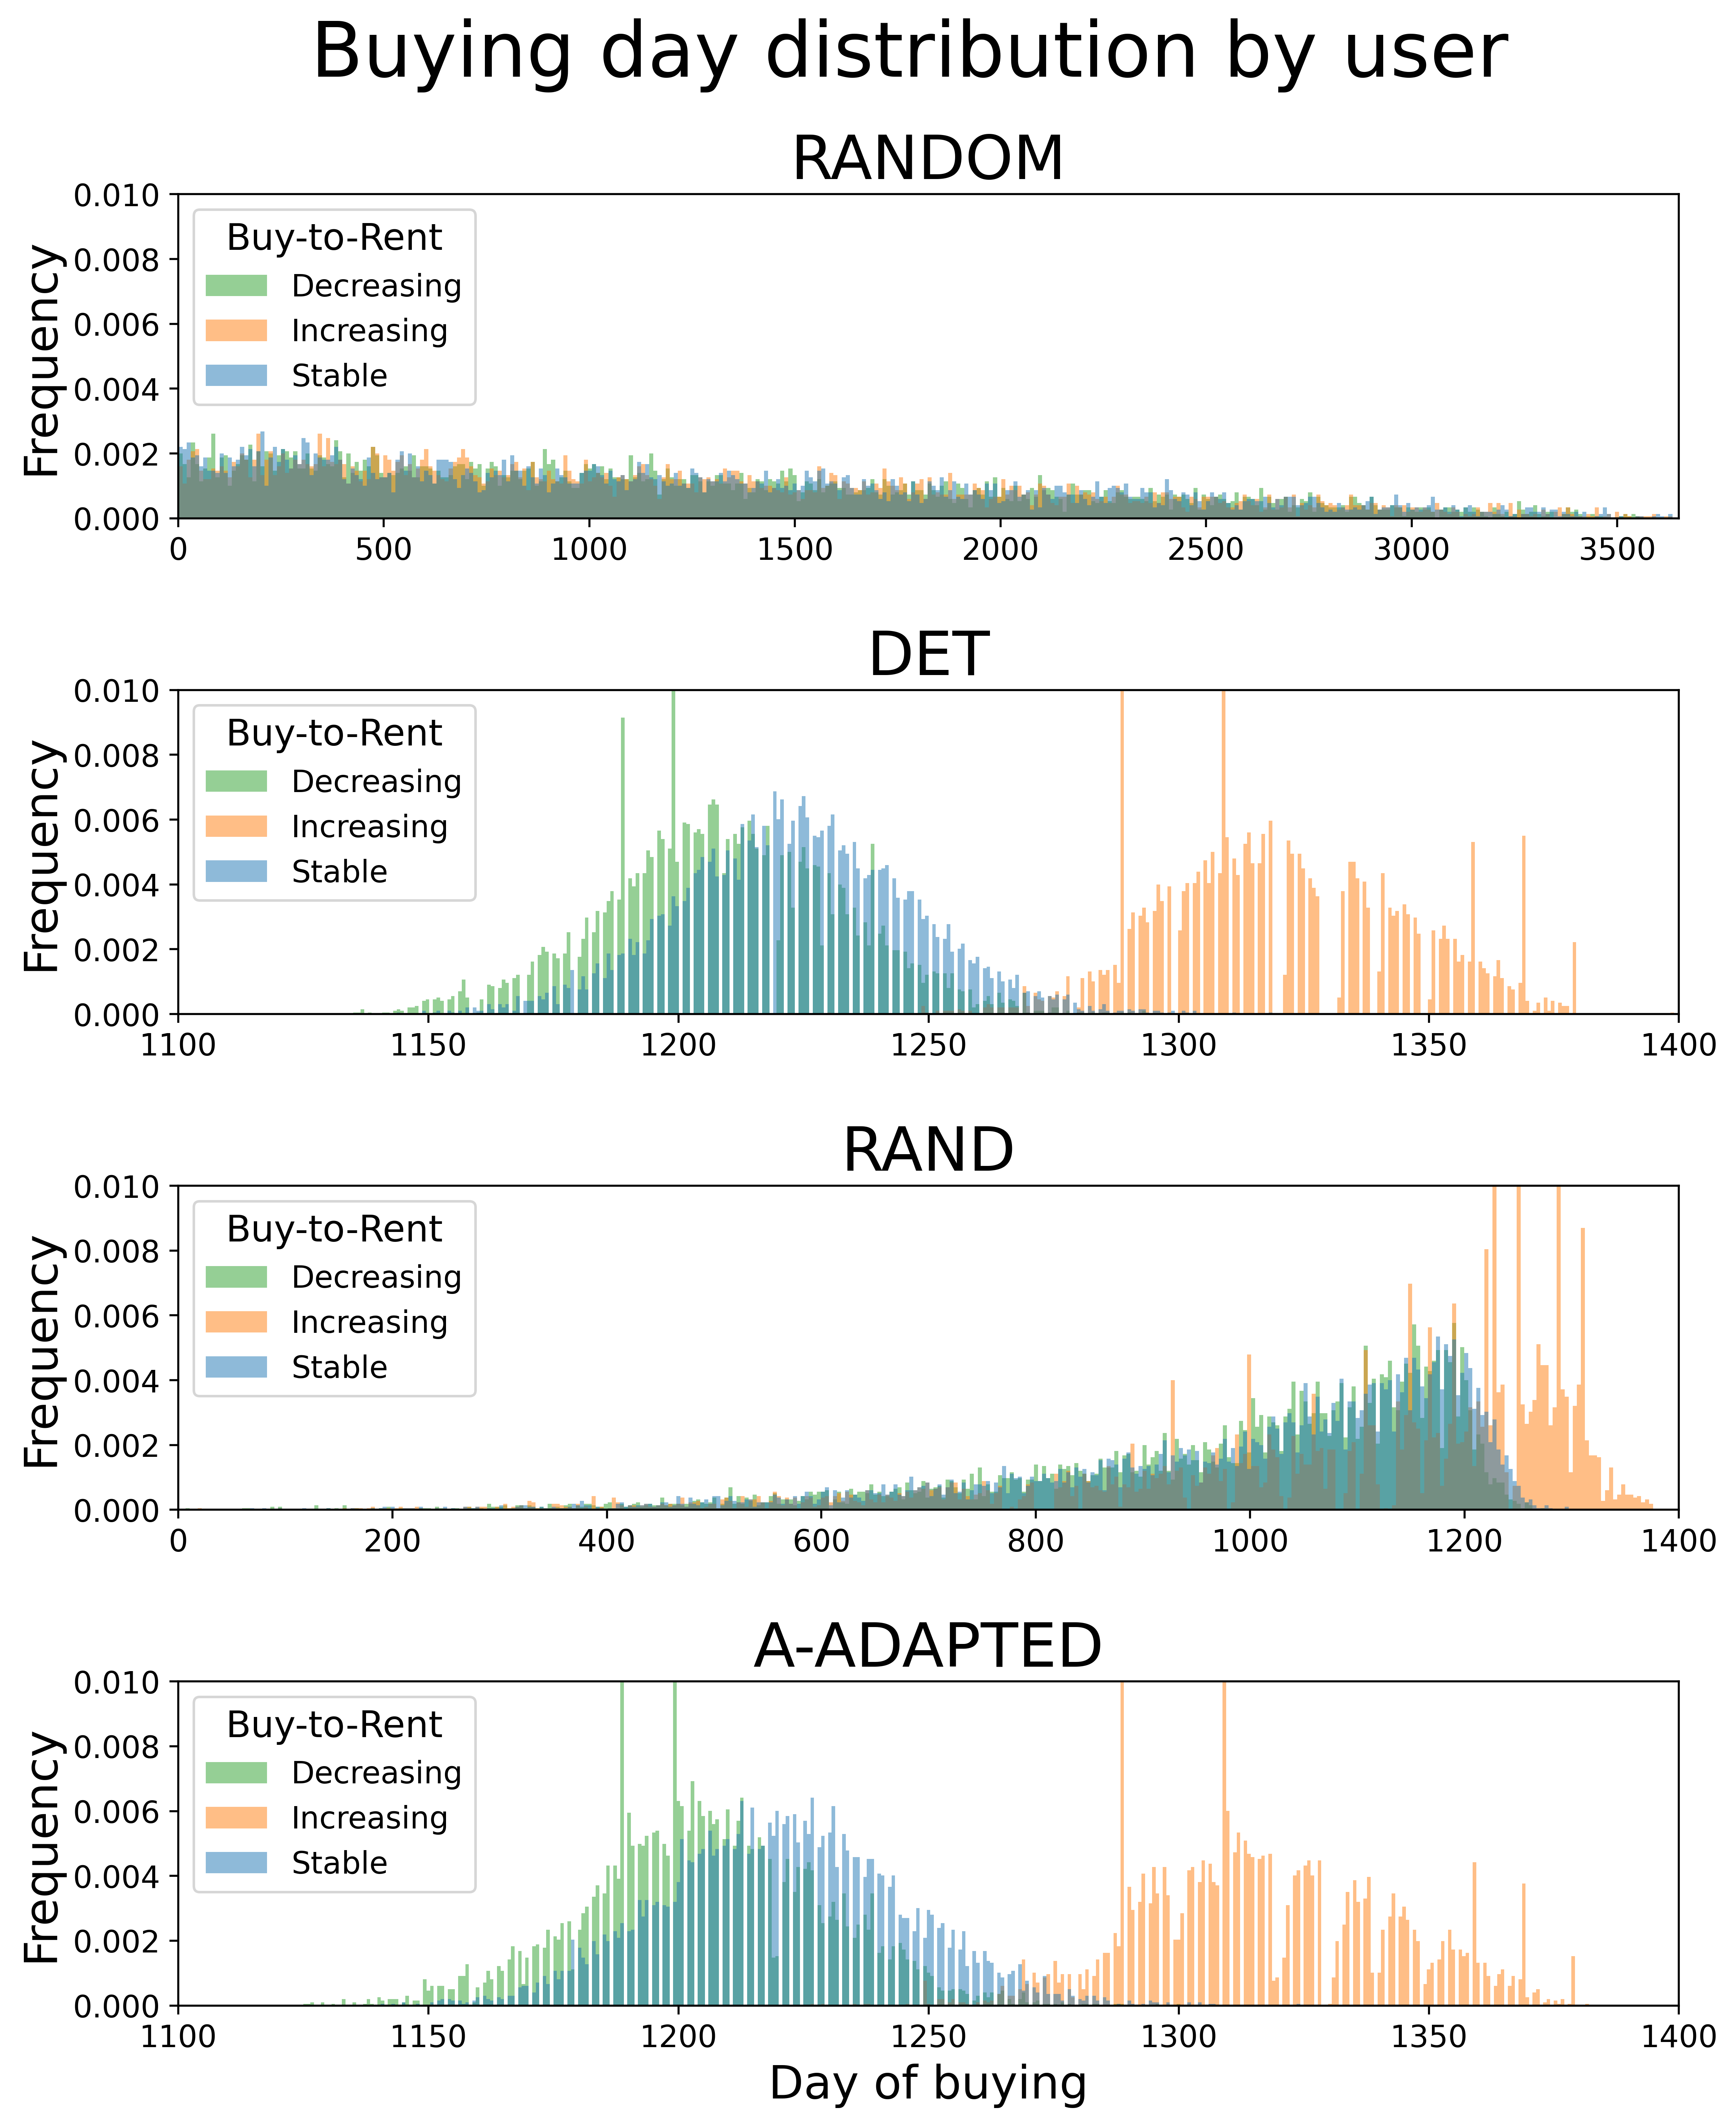

In [14]:
# Select only the runs where the user BOUGHT
_df_tmp = df[df["state"] == "BOUGHT"]

# Initialize plot
fig, ax = plt.subplots(4, 1, figsize=(10, 12), dpi=500)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
# plt.rcParams["patch.force_edgecolor"] = True
plt.subplots_adjust(top=0.9)
plt.suptitle("Buying day distribution by user", fontsize=30)

# Lists of values
_titles = ["RANDOM", "DET", "RAND", "A-ADAPTED"]
_xlims = [(0, 3650), (1100, 1400), (0, 1400), (1100, 1400)]
_ylims = [(0, 0.01), (0, 0.01), (0, 0.01), (0, 0.01)]

for i in range(4):

    # Set title
    ax[i].set_title(_titles[i], fontsize=24)

    # Set limits
    ax[i].set_xlim(_xlims[i])
    ax[i].set_ylim(_ylims[i])

    # Plot
    data = _df_tmp[_df_tmp["main_user_strategy"] == _titles[i]]
    sns.histplot(ax=ax[i], x="bought_at_day", data=data,
                 hue="price_trend", bins=365, stat="probability", linewidth=0)

    # Set labels and ticks
    if i == 3:
        ax[i].set_xlabel("Day of buying", fontsize=18)
    else:
        ax[i].set_xlabel("")
    ax[i].set_ylabel("Frequency", fontsize=18)
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)

    # Set legend
    ax[i].legend(title="Buy-to-Rent", loc='upper left', fontsize=12,
                 labels=["Decreasing", "Increasing", "Stable"])

plt.savefig(
    "Model/Experiments/single-user-exchange-speculation/output/img/single-user-speculation-buying-day.png", format="png", bbox_inches="tight", dpi=1000)
plt.savefig("Presentation/single-user-speculation-buying-day.png",
            format="png", bbox_inches="tight")


### Analysis of the y-value of A-ADAPTED

In [9]:
_df_tmp = df[df["main_user_strategy"] == "A-ADAPTED"]
_df_tmp


,index,RunId,main_user_strategy,AgentID,state,bought_at_day,max_days,initial_buy_price,potential_FIAT_spent_rent,total_FIAT_spent_rent,total_FIAT_spent_buying,optimal,main_user_CR,adoption_ratio,price_trend,y,adoption_speed
150000,0,0,A-ADAPTED,1,RENTING,0,315,12260362113.821,93724342.848,93724342.848,0.000,93724342.848,1.000,0.000,None,1.000,0.000
150001,1,1,A-ADAPTED,1,RENTING,0,707,12257485538.199,1426915496.755,1426915496.755,0.000,1426915496.755,1.000,0.000,None,1.000,0.000
150002,2,2,A-ADAPTED,1,RENTING,0,862,12258582372.514,3278607727.193,3278607727.193,0.000,3278607727.193,1.000,0.000,None,0.999,0.000
150003,3,3,A-ADAPTED,1,BOUGHT,1185,2920,12260191271.685,80491232474.151,12155957646.044,12258090234.470,12260191271.685,1.991,1.000,None,0.991,0.325
150004,4,4,A-ADAPTED,1,BOUGHT,1260,2608,12258422869.949,61452596012.804,12114283271.936,12256491153.002,12258422869.949,1.988,1.000,None,0.989,0.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,9995,9995,A-ADAPTED,1,BOUGHT,1234,1663,12261969274.550,27272744713.624,11652092008.478,11745054423.474,12261969274.550,1.908,1.000,VET-down,0.994,0.338
179996,9996,9996,A-ADAPTED,1,BOUGHT,1227,1260,12257966479.337,12728068669.509,11576185965.373,11734339149.317,12257966479.337,1.902,1.000,VET-down,0.989,0.336
179997,9997,9997,A-ADAPTED,1,BOUGHT,1182,2397,12261313305.627,57094406081.005,11709485396.605,11778604239.765,12261313305.627,1.916,1.000,VET-down,0.991,0.324
179998,9998,9998,A-ADAPTED,1,BOUGHT,1222,3167,12260191271.685,86347121142.793,11651024244.371,11730937953.236,12260191271.685,1.907,1.000,VET-down,0.996,0.335


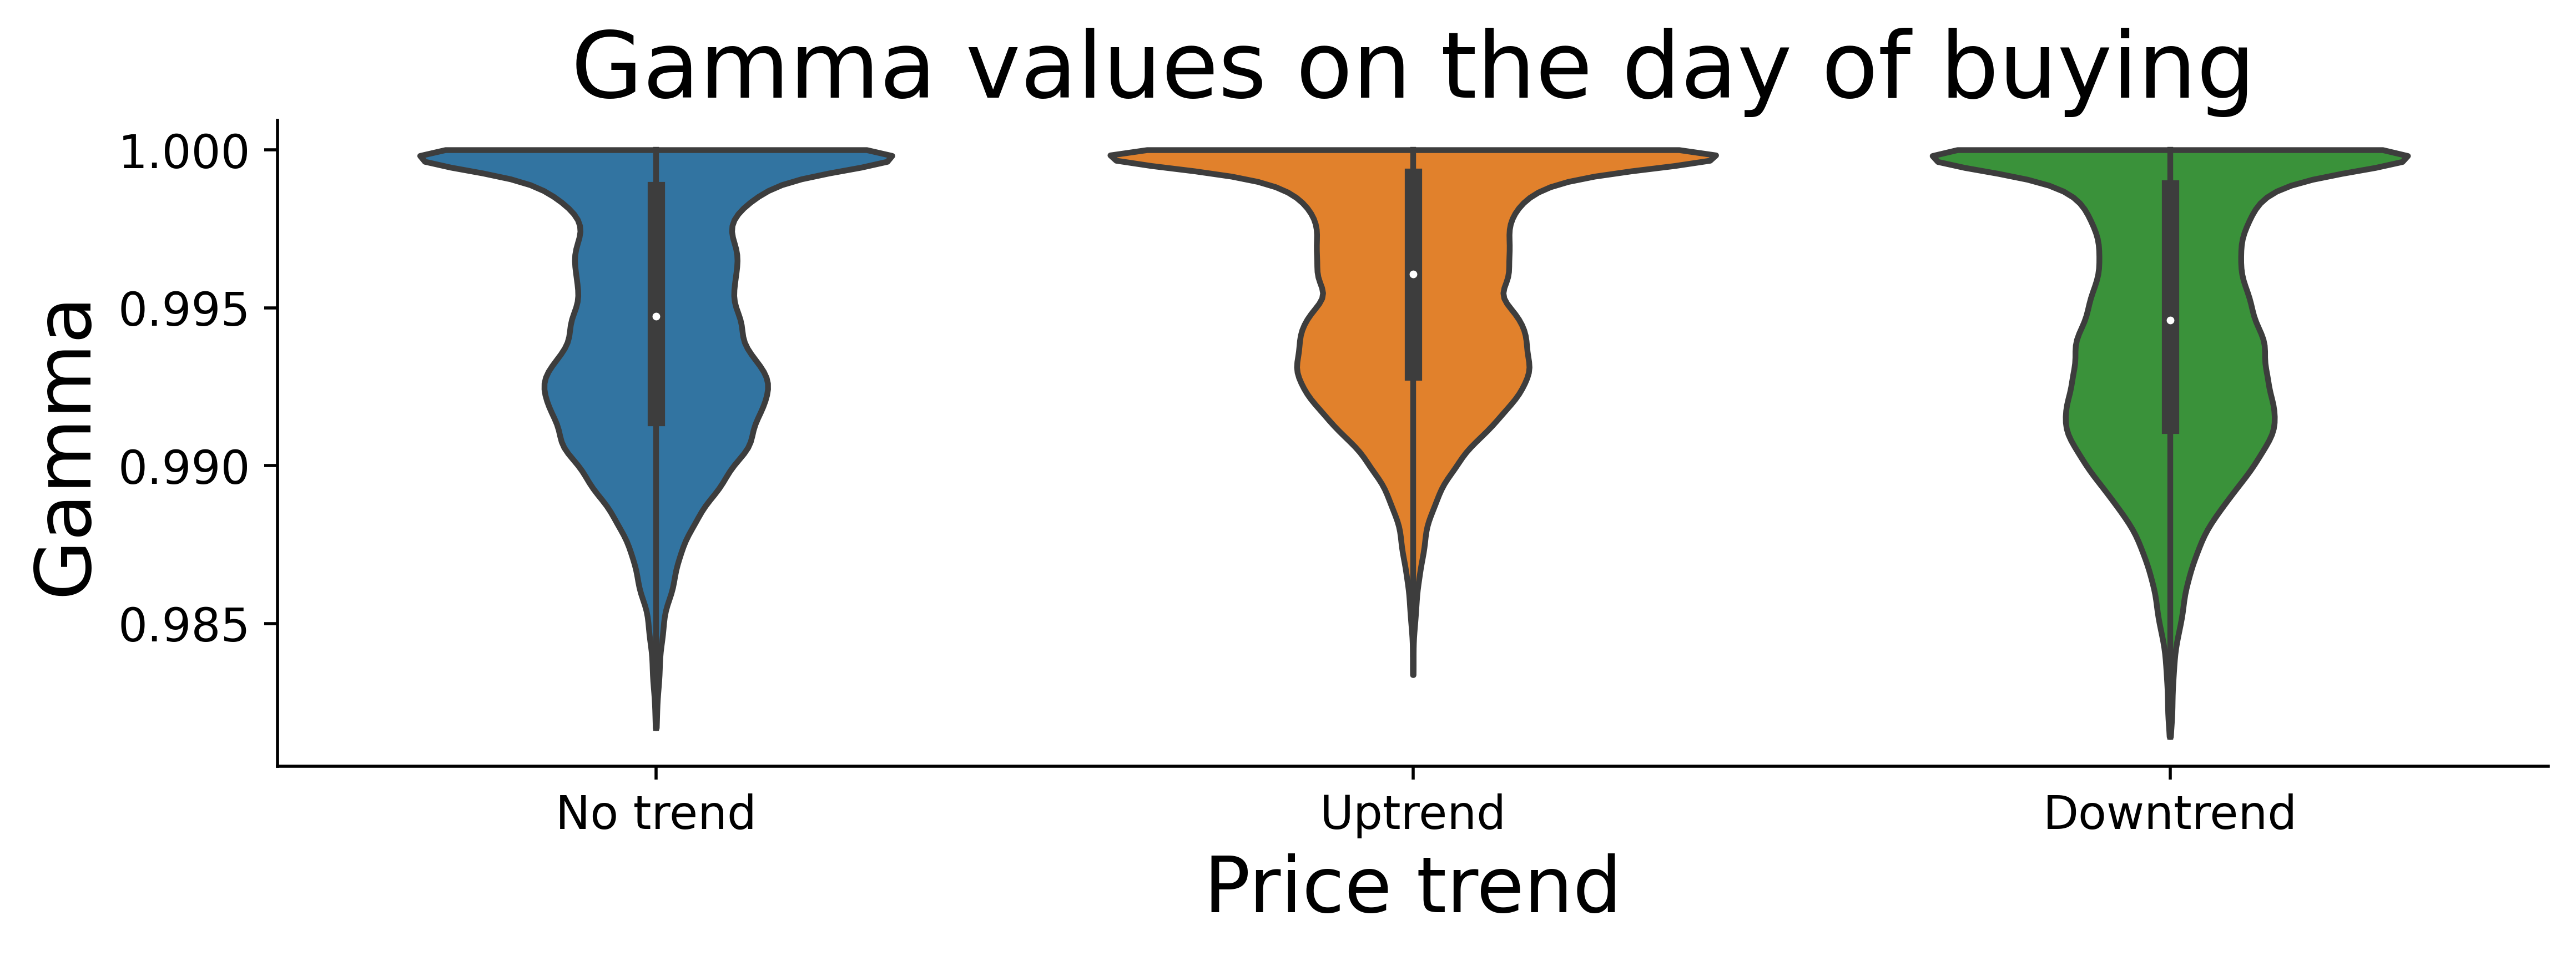

In [10]:
# Select only the runs where the user BOUGHT
_df_tmp = df[df["main_user_strategy"] == "A-ADAPTED"]

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=500)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.title("Gamma values on the day of buying", fontsize=24)


# Plot
data = df[df["main_user_strategy"] == "A-ADAPTED"]
sns.violinplot(ax=ax, y="y", data=data, x="price_trend", cut=0, bw=.1)
# bw = 1, cut = 0, scale = "area", alpha = 0.4

# Set labels and ticks
ax.set_xlabel("Price trend", fontsize=20)
ax.set_ylabel("Gamma", fontsize=20)
ax.set_xticklabels(["No trend", "Uptrend", "Downtrend"])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

sns.despine(offset=0, trim=False, left=False)

plt.savefig(
    "Model/Experiments/single-user-exchange-speculation/output/img/single-user-speculation-gamma.pdf", format="pdf", bbox_inches="tight", dpi=1000)


### A-ADAPTED adoption over time

In [11]:
df2 = pd.read_csv(
    "Model/Experiments/single-user-exchange-speculation/output/data/a-adapted-adoption-buy-to-rent/a-adapted-adoption-buy-to-rent.csv")
group = df2.groupby(["Step"]).agg(np.mean)
df2

,Unnamed: 0,RunId,iteration,Step,experiment_setting,economic_model,simulation_length,generation_rate,initial_VTHO_usage,final_VTHO_usage,...,VTHO_LOB_ID,total_FIAT_spent_rent,VET_LOB_ID,total_FIAT_spent_buying,initial_buy_price,b,max_a,y,CR,optimal
0,0,0,0,0,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,[],0.000,[],0.000,0.000,0,1.000,1.000,0.000,0.000
1,1,0,0,10,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,71,366652.484,31,0.000,12260816059.961,0,1.946,1.000,0.000,0.000
2,2,0,0,20,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,3,806173.734,10,0.000,12260816059.961,0,2.049,1.000,0.000,0.000
3,3,0,0,30,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,84,1325964.446,14,0.000,12260816059.961,0,2.156,1.000,0.000,0.000
4,4,0,0,40,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,27,1921747.044,91,0.000,12260816059.961,0,2.461,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366995,366995,999,0,3620,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,37,12120531010.449,46,12261328110.226,12262537231.970,0,5.369,0.985,1.988,12262537231.970
366996,366996,999,0,3630,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,37,12120531010.449,46,12261328110.226,12262537231.970,0,5.369,0.985,1.988,12262537231.970
366997,366997,999,0,3640,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,37,12120531010.449,46,12261328110.226,12262537231.970,0,5.369,0.985,1.988,12262537231.970
366998,366998,999,0,3650,SINGLE-USER-EXCHANGE-SPECULATION,<Model.Code.src.models.EconomicModel.EconomicM...,3650,0.000,22475914.854,22475914.854,...,37,12120531010.449,46,12261328110.226,12262537231.970,0,5.369,0.985,1.988,12262537231.970


In [12]:
group = df2.groupby(["Step"]).agg(np.mean)
group["buy_to_rent"]


Step
0      36265.432
10     30582.664
20     26017.702
30     22362.551
40     19377.645
          ...   
3620    1077.884
3630    1077.884
3640    1077.884
3650    1077.884
3651    1077.884
Name: buy_to_rent, Length: 367, dtype: float64

NameError: name 'group' is not defined

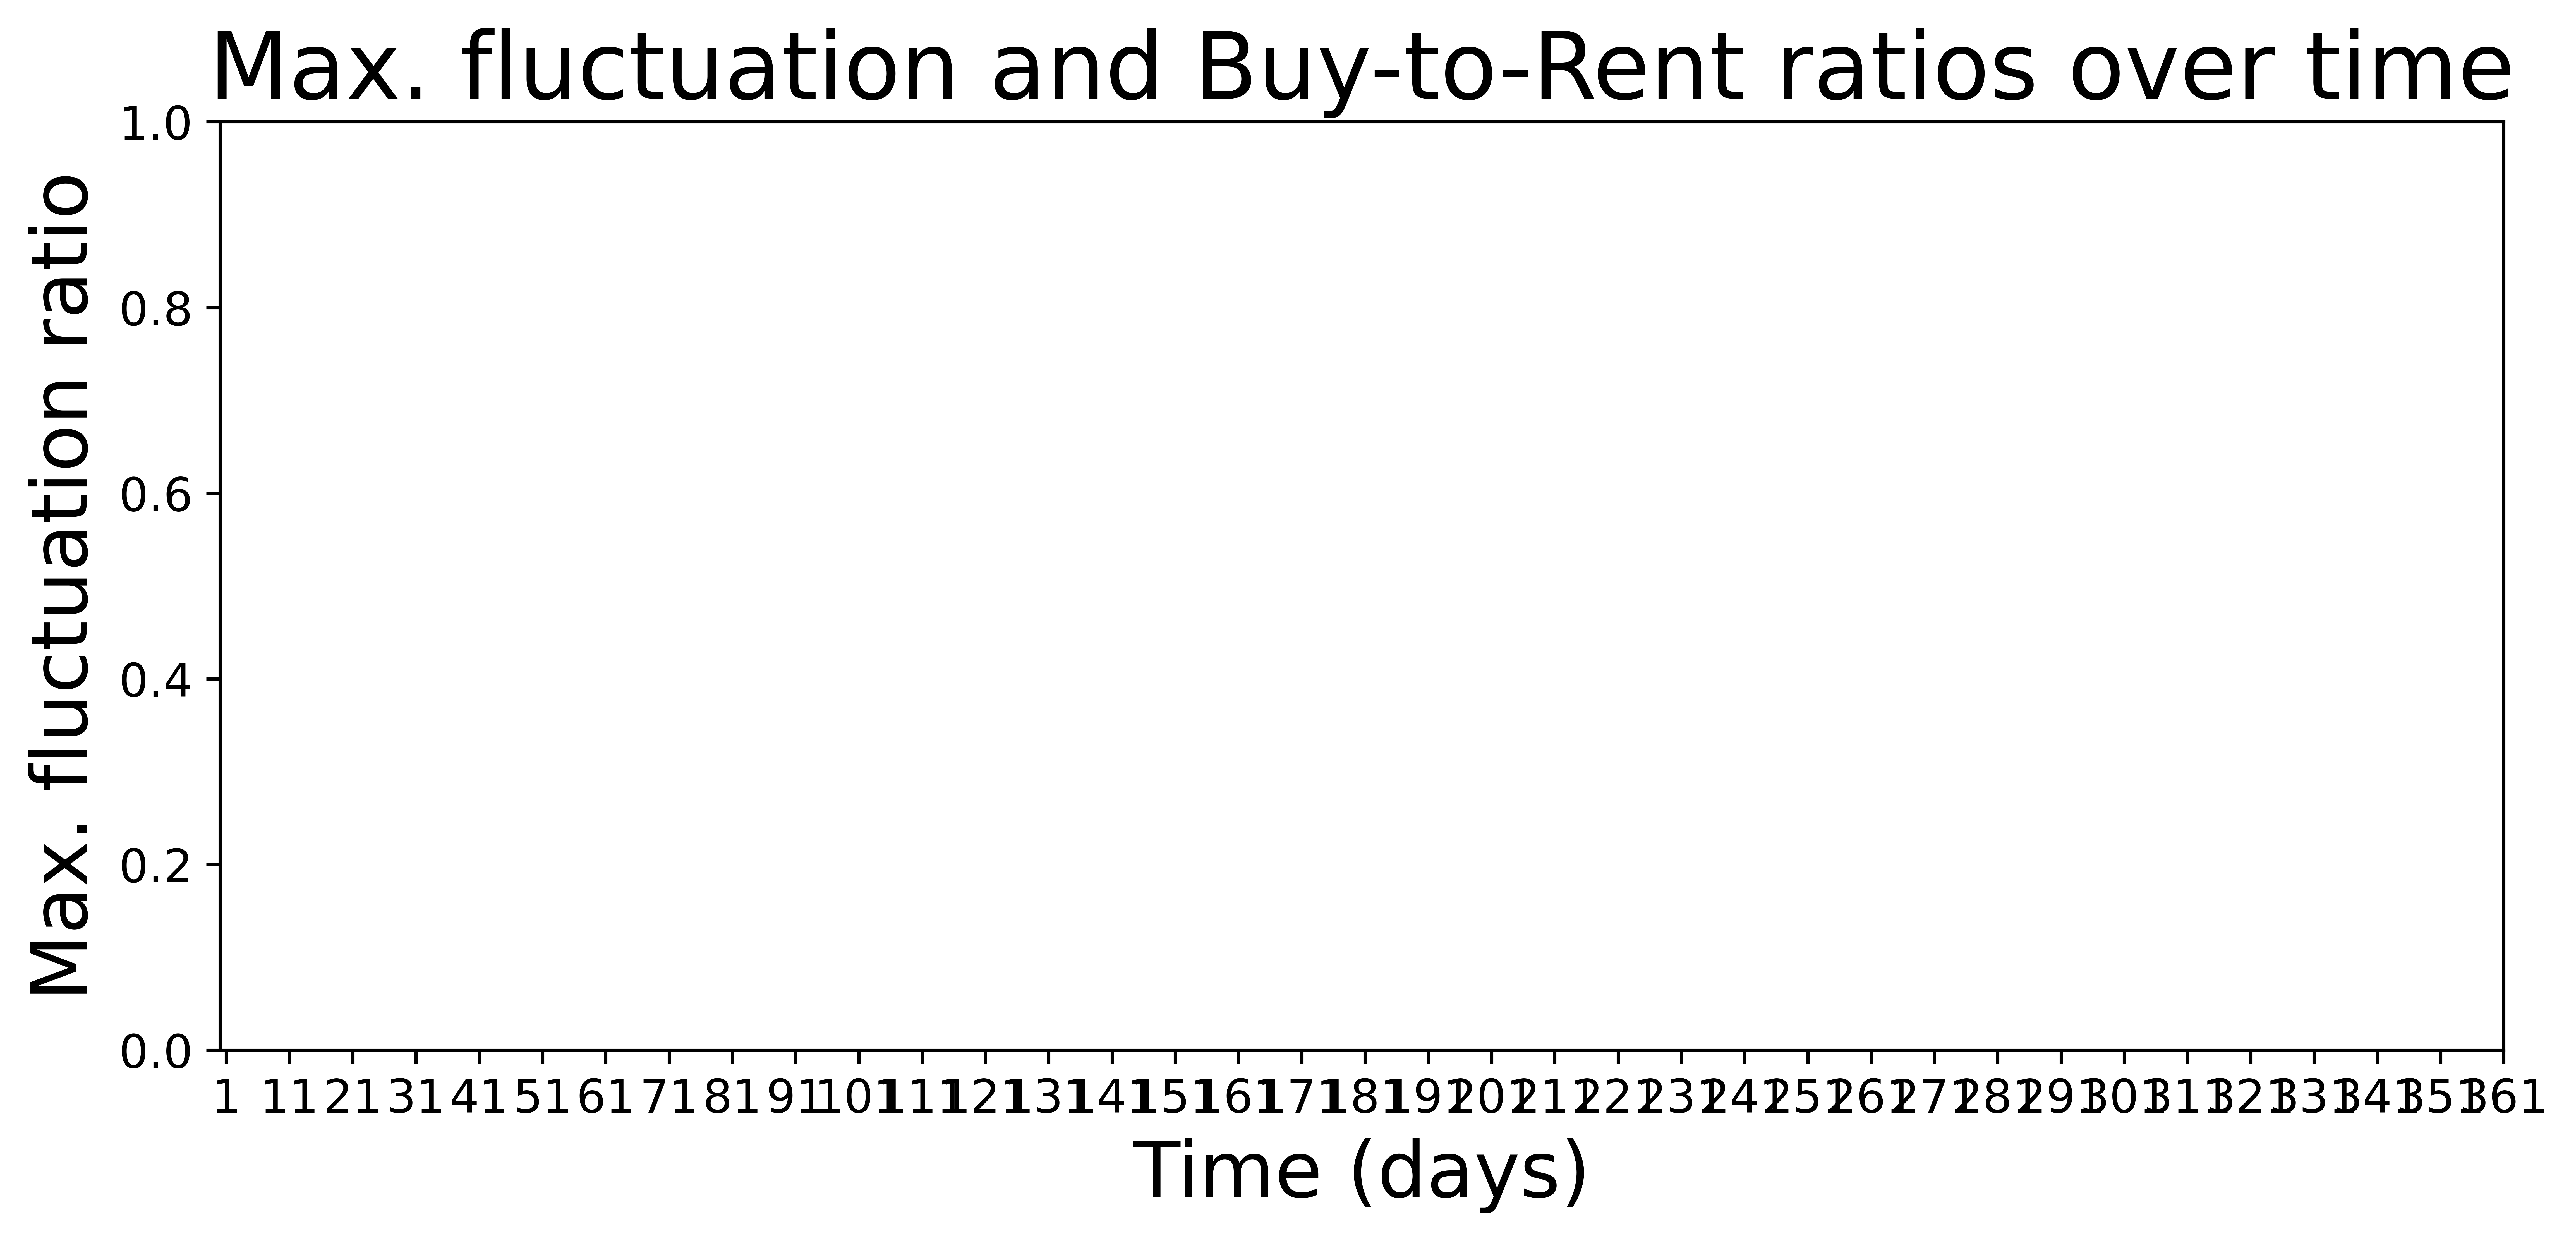

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=1000)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.title("Max. fluctuation and Buy-to-Rent ratios over time", fontsize=24)

ax.set_xlabel('Time (days)', color='black', fontsize=20)
ax.set_ylabel('Max. fluctuation ratio', color='black', fontsize=20)
ax.tick_params(axis='x', labelsize=12,)

ax.tick_params(axis='y', labelsize=12)

ticks = [i for i in range(0, 365,10)]
labels = [i for i in range(0, 3650, 100)]
ax.set_xticks(ticks, labels=None,)
# ax.set_xticklabels()

plot1 = ax.plot(range(367), group["max_a"], color="black", label="Max. fluctuation")



ax2 = ax.twinx()
plot2 = ax2.plot(range(367), group["buy_to_rent"],
                 color="red", label="Buy-to-Rent", linestyle="--")
ax2.set_ylabel('Buy-to-Rent ratio', color='red', fontsize=20)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)


# Add legend
lns = plot1 + plot2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc="upper right", fontsize=14, title="Ratio")

plt.savefig("Model/Experiments/single-user-exchange-speculation/output/img/fluctuation-buy-to-rent.pdf",
            format="pdf", bbox_inches="tight")
